# Data Augmentation
Bootstrapping involves randomly sampling from the dataset (with replacement) to generate new datasets. This can help train the model on a variety of data "combinations", potentially helping it to generalize better.

Jittering involves adding a small amount of random noise to the data to produce slightly different data points. This can help the model to become more robust.


In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import numpy as np

# Loading the dataset and preprocessing
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")
columns_to_drop = ['id', 'Plot_Name']
data = data.drop(columns=columns_to_drop)
data = data.dropna()  # Handle missing values

X = data [['Cire_CV', 'Temperature', 'Wind speed', 'SoilHumi', 'K', 'Evapotranspiration', 'P']]
# X = data.drop(columns=["Seed"])
#From Top 10
# X = data [['Cigr_CD',
#   'Cire_CD',
#   'EVI2_CD',
#   'NDRE_CD',
#   'NDVI_CD',
#   'Cire_CV',
#   'EVI2_CV',
#   'Uv radiation',
#   'Humidity',
#   'Temperature']]
y = data['Seed']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models Definition
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor(max_iter=10000)),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))
]

# Bootstrapping and Model Evaluation
results = []

n_iterations = 100

for name, model in models:
    predictions = []
    for i in range(n_iterations):
        # Sample with replacement from X_train and y_train
        X_sample, y_sample = resample(X_train, y_train)
        
        # Train the model on the bootstrapped sample
        model.fit(X_sample, y_sample)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        predictions.append(y_pred)
    
    # Averaging predictions from all iterations
    avg_predictions = np.mean(predictions, axis=0)
    
    mae = mean_absolute_error(y_test, avg_predictions)
    mse = mean_squared_error(y_test, avg_predictions)
    rmse = mean_squared_error(y_test, avg_predictions, squared=False)
    r2 = r2_score(y_test, avg_predictions)
    
    results.append([name, mae, mse, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])
print(results_df)


                 Model       MAE        MSE      RMSE        R2
0             CatBoost  1.926224   4.941936  2.223047  0.517191
1        Decision Tree  1.560222   4.487050  2.118266  0.561632
2           ElasticNet  3.100503  11.850134  3.442402 -0.157714
3    Gradient Boosting  1.523844   3.927742  1.981853  0.616274
4                Huber  2.191339   6.732308  2.594669  0.342278
5                  KNN  3.284689  12.684020  3.561463 -0.239182
6     Lasso Regression  3.127388  12.132175  3.483127 -0.185269
7    Linear Regression  2.035399   6.192129  2.488399  0.395052
8         M-estimators  2.215240   7.048774  2.654953  0.311361
9   Passive Aggressive  3.382961  13.630810  3.691993 -0.331680
10       Random Forest  1.676394   4.518718  2.125728  0.558538
11    Ridge Regression  2.350717   7.283580  2.698811  0.288421
12                 SVR  3.139882  12.091955  3.477349 -0.181339
13             XGBoost  1.315634   2.944279  1.715890  0.712355


In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.utils import resample
import numpy as np

# Loading the dataset and preprocessing
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")
columns_to_drop = ['id', 'Plot_Name']
data = data.drop(columns=columns_to_drop)
data = data.dropna()  # Handle missing values

X = data [['Cire_CV', 'Temperature', 'Wind speed', 'SoilHumi', 'K', 'Evapotranspiration', 'P']]
y = data['Seed']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bootstrapping with Random Forest
n_iterations = 100
predictions = []

# model = RandomForestRegressor(random_state=42)

# Models Definition
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor(max_iter=10000)),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))
]

for i in range(n_iterations):
    # Sample with replacement from X_train and y_train
    X_sample, y_sample = resample(X_train, y_train)
    
    # Train the model on the bootstrapped sample
    model.fit(X_sample, y_sample)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    predictions.append(y_pred)

# Averaging predictions from all iterations
avg_predictions = np.mean(predictions, axis=0)

# Evaluate the performance
r2 = r2_score(y_test, avg_predictions)
print(f"R2 Score after bootstrapping: {r2}")



R2 Score after bootstrapping: 0.5620740463502595


# Feature Selection, Regulization and Cross Validation

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

# Loading the dataset and preprocessing
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")
columns_to_drop = ['id', 'Plot_Name']
data = data.drop(columns=columns_to_drop)
data = data.dropna()  # Handle missing values

X = data [['Cire_CV', 'Temperature', 'Wind speed', 'SoilHumi', 'K', 'Evapotranspiration', 'P']]
y = data['Seed']

# # Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Models Definition
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor(max_iter=10000)),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))
]

# Model Evaluation with Cross-Validation
results = []

for name, model in models:
    pipeline = make_pipeline(StandardScaler(), model)
    cv_scores = cross_val_score(pipeline, X_scaled, y, cv=3, scoring='r2') # 5-fold CV
    avg_r2 = cv_scores.mean()
    results.append([name, avg_r2])

results_df = pd.DataFrame(results, columns=["Model", "Avg R2 Score (3-fold CV)"])
results_df.to_csv('cross_val_results.csv', index=False)
results_df


,Model,Avg R2 Score (3-fold CV)
0,CatBoost,0.007440
1,Decision Tree,-0.181047
2,ElasticNet,0.225307
3,Gradient Boosting,-0.045079
4,Huber,-2.780463
5,KNN,-0.110044
6,Lasso Regression,0.131329
7,Linear Regression,-2.199678
8,M-estimators,-3.236962
9,Passive Aggressive,-7.894166


# Feature Creation:
Interaction terms: Multiply two or more features to see if their interaction is a good predictor.
Polynomial features: Use polynomial features to capture non-linear relationships.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Loading the dataset and preprocessing
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")
columns_to_drop = ['id', 'Plot_Name']
data = data.drop(columns=columns_to_drop)
data = data.dropna()  # Handle missing values

X = data.drop(columns=["Seed"])
y = data['Seed']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering: Interaction terms
interaction_data = X_train.copy()
for col1 in X_train.columns:
    for col2 in X_train.columns:
        if col1 != col2:
            interaction_data[f'{col1}_{col2}'] = X_train[col1] * X_train[col2]

# Feature Engineering: Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(X_train)

# Training the model with original features
model_original = RandomForestRegressor(random_state=42)
model_original.fit(X_train, y_train)
pred_original = model_original.predict(X_test)
r2_original = r2_score(y_test, pred_original)

# Training the model with interaction terms
model_interaction = RandomForestRegressor(random_state=42)
model_interaction.fit(interaction_data, y_train)
interaction_test = X_test.copy()
for col1 in X_test.columns:
    for col2 in X_test.columns:
        if col1 != col2:
            interaction_test[f'{col1}_{col2}'] = X_test[col1] * X_test[col2]
pred_interaction = model_interaction.predict(interaction_test)
r2_interaction = r2_score(y_test, pred_interaction)

# Training the model with polynomial features
model_poly = RandomForestRegressor(random_state=42)
model_poly.fit(poly_data, y_train)
pred_poly = model_poly.predict(poly.transform(X_test))
r2_poly = r2_score(y_test, pred_poly)

# Visualizing the R2 scores
labels = ['Original', 'Interaction', 'Polynomial']
scores = [r2_original, r2_interaction, r2_poly]
plt.bar(labels, scores)
plt.ylabel('R2 Score')
plt.title('R2 Score with Different Feature Sets')
plt.ylim(0, 1)
plt.show()

# Save the R2 scores to CSV
results_df = pd.DataFrame({
    'Feature Set': labels,
    'R2 Score': scores
})

results_df.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/6Oct_Result/R2_scores_comparison.csv", index=False)

print("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/6Oct_Result/R2_scores_comparison.csv")


# Feature Selection: 
a. Recursive Feature Elimination (RFE):b. Feature Importance:

In [13]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_new = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")

# Data Preprocessing
columns_to_drop_new = ['id', 'Plot_Name']
data_new = data_new.drop(columns=columns_to_drop_new)
data_new = data_new.dropna()  # Handle missing values

X_new = data_new.drop(columns=["Seed"])
y_new = data_new['Seed']

# Using RandomForestRegressor for RFE
model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)  # Selecting top 10 features
fit = rfe.fit(X_new, y_new)
selected_features_rfe = X_new.columns[fit.support_].tolist()

# Using RandomForestRegressor to get feature importances directly
model.fit(X, y)
feature_importances = model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
top_features_importance = features_df.sort_values(by='Importance', ascending=False).head(10)['Feature'].tolist()


selected_features_rfe, top_features_importance


(['Cigr_CD',
  'Cire_CD',
  'EVI2_CD',
  'NDRE_CD',
  'NDVI_CD',
  'Cire_CV',
  'EVI2_CV',
  'Uv radiation',
  'Humidity',
  'Temperature'],
 ['Cire_CV',
  'Temperature',
  'Wind speed',
  'SoilHumi',
  'K',
  'Evapotranspiration',
  'P'])

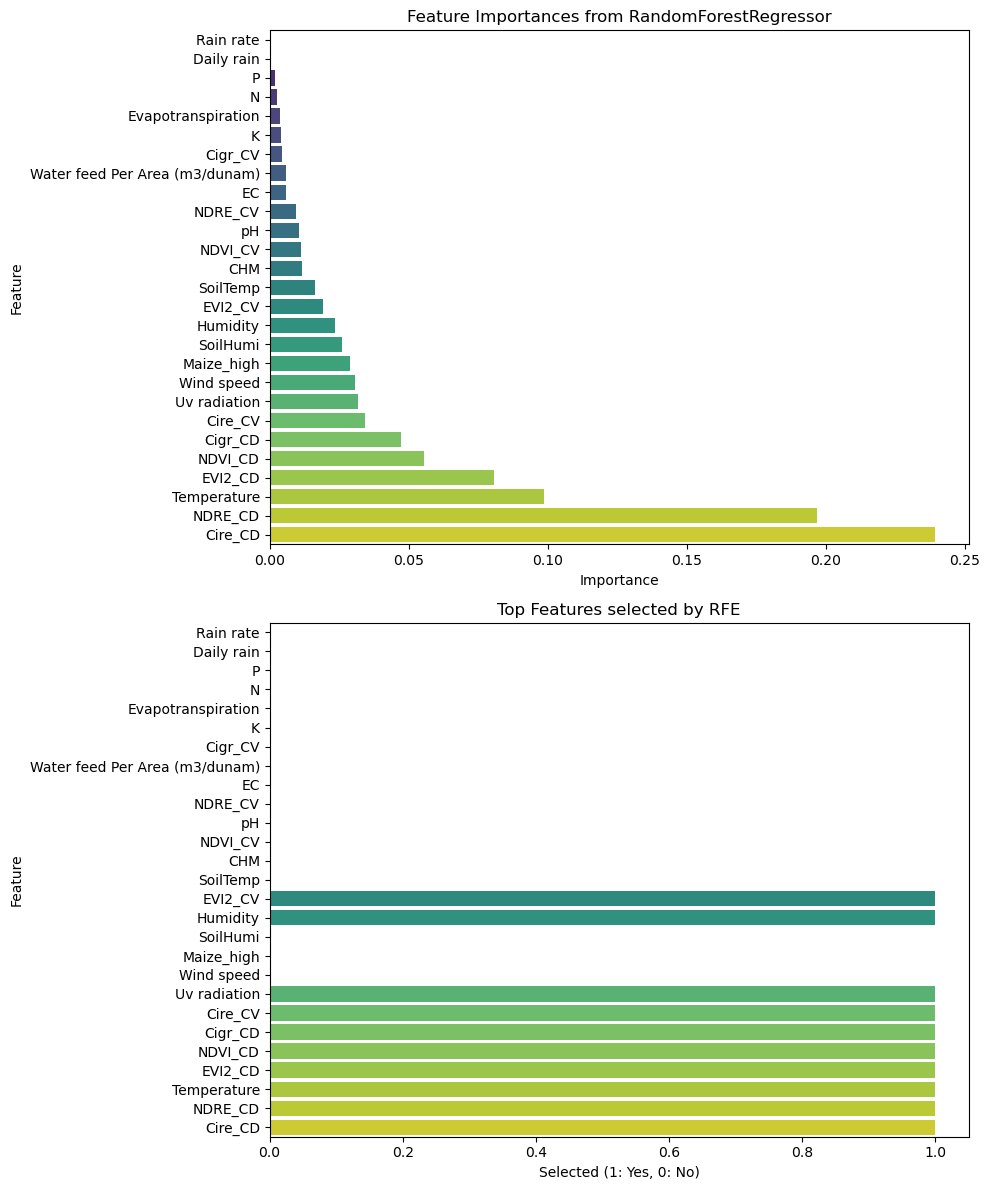

In [14]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the provided path
data_new = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")

# Data Preprocessing
columns_to_drop_new = ['id', 'Plot_Name']
data_new = data_new.drop(columns=columns_to_drop_new)
data_new = data_new.dropna()  # Handle missing values

X_new = data_new.drop(columns=["Seed"])
y_new = data_new['Seed']

# Using RandomForestRegressor for RFE
model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)  # Selecting top 10 features
fit = rfe.fit(X_new, y_new)
selected_features_rfe = X_new.columns[fit.support_].tolist()

# Using RandomForestRegressor to get feature importances directly
model.fit(X_new, y_new)
feature_importances = model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_new.columns,
    'Importance': feature_importances
})

# Sorting features based on importance for visualization
features_df_sorted = features_df.sort_values(by='Importance', ascending=True)

# Plotting feature importances
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.barplot(x='Importance', y='Feature', data=features_df_sorted, palette="viridis")
plt.title("Feature Importances from RandomForestRegressor")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Plotting RFE selected features
plt.subplot(2, 1, 2)
sns.barplot(x=features_df_sorted['Feature'].isin(selected_features_rfe), y=features_df_sorted['Feature'], palette="viridis")
plt.title("Top Features selected by RFE")
plt.xlabel("Selected (1: Yes, 0: No)")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


# Feature Engineering 

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
# Load the dataset
#data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")

data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/6Oct_Result/augmented_dataset.csv")

# Data Preprocessing
columns_to_drop = ['id', 'Plot_Name']
data = data.drop(columns=columns_to_drop)
data = data.dropna()  # Handle missing values

# X = data.drop(columns=["Seed"])
# X = data[['Cire_CV', 'P', 'K', 'SoilHumi', 'Wind speed', 'Temperature', 'Evapotranspiration']]

#From Top Features selected by Recursive Feature Elimination (RFE) with RandomForestRegressor:
X = data [['Cire_CV',
    'Temperature',
    'Wind speed',
    'SoilHumi',
    'K',
    'Evapotranspiration',
    'P']]

#From Top 10
# X = data [['Cigr_CD',
#   'Cire_CD',
#   'EVI2_CD',
#   'NDRE_CD',
#   'NDVI_CD',
#   'Cire_CV',
#   'EVI2_CV',
#   'Uv radiation',
#   'Humidity',
#   'Temperature']]

y = data['Seed']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Definition
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor(max_iter=10000)),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))
]

# Model Evaluation
results = []

for name, model in models:
    # Using a pipeline to ensure that scaling is applied during cross-validation steps as well
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    results.append([name, mae, mse, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])
results_df

,Model,MAE,MSE,RMSE,R2
0,CatBoost,1.403658,3.058785,1.748938,0.701168
1,Decision Tree,2.211111,8.494444,2.914523,0.170124
2,ElasticNet,2.636029,8.894167,2.982309,0.131073
3,Gradient Boosting,1.278963,3.051818,1.746945,0.701849
4,Huber,1.678734,5.017441,2.239965,0.509815
5,KNN,2.764444,9.218667,3.036226,0.099370
6,Lasso Regression,2.750862,9.426015,3.070182,0.079113
7,Linear Regression,1.878965,5.605133,2.367516,0.452399
8,M-estimators,3.049258,12.100498,3.478577,-0.182174
9,Passive Aggressive,2.147697,8.188322,2.861524,0.200031


# Neural Networks and LightGBM for this regression problem.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
import lightgbm as lgb

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")

# Data Preprocessing
columns_to_drop = ['id', 'Plot_Name']
data = data.drop(columns=columns_to_drop)
data = data.dropna()  # Handle missing values

X = data[['Cire_CV', 'P', 'K', 'SoilHumi', 'Wind speed', 'Temperature', 'Evapotranspiration']]
y = data['Seed']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data for Neural Network
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

nn_preds = model.predict(X_test_scaled)
print(f"R2 Score (Neural Network): {r2_score(y_test, nn_preds):.4f}")

# LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l2',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)
lgb_preds = bst.predict(X_test, num_iteration=bst.best_iteration)
print(f"R2 Score (LightGBM): {r2_score(y_test, lgb_preds):.4f}")


# Volting, Stack, Bagging

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor, BaggingRegressor

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")

# Data Preprocessing
columns_to_drop = ['id', 'Plot_Name']
data = data.drop(columns=columns_to_drop)
data = data.dropna()  # Handle missing values

X = data[['Cire_CV', 'P', 'K', 'SoilHumi', 'Wind speed', 'Temperature', 'Evapotranspiration']]
y = data['Seed']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training models
xgb = XGBRegressor(random_state=42)
cat = CatBoostRegressor(verbose=0, random_state=42)

xgb.fit(X_train, y_train)
cat.fit(X_train, y_train)

# Making predictions
xgb_preds = xgb.predict(X_test)
cat_preds = cat.predict(X_test)

# Simple Averaging
avg_preds = (xgb_preds + cat_preds) / 2
r2_avg = r2_score(y_test, avg_preds)
print(f"R2 Score (Simple Averaging): {r2_avg:.4f}")

# Weighted Averaging (based on individual R2 scores)
r2_xgb = r2_score(y_test, xgb_preds)
r2_cat = r2_score(y_test, cat_preds)
total_r2 = r2_xgb + r2_cat

weighted_preds = (r2_xgb * xgb_preds + r2_cat * cat_preds) / total_r2
r2_weighted = r2_score(y_test, weighted_preds)
print(f"R2 Score (Weighted Averaging): {r2_weighted:.4f}")

# Stacking
estimators = [
    ('xgboost', XGBRegressor(random_state=42)),
    ('catboost', CatBoostRegressor(verbose=0, random_state=42))
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_regressor.fit(X_train, y_train)
y_pred_stacking = stacking_regressor.predict(X_test)

r2_stacking = r2_score(y_test, y_pred_stacking)
print(f"R2 Score (Stacking): {r2_stacking:.4f}")

# Bootstrap Aggregating (Bagging)

# For XGBoost
bagging_xgboost = BaggingRegressor(base_estimator=XGBRegressor(random_state=42), n_estimators=10, random_state=42)
bagging_xgboost.fit(X_train, y_train)
y_pred_bagging_xgboost = bagging_xgboost.predict(X_test)

# For CatBoost
bagging_catboost = BaggingRegressor(base_estimator=CatBoostRegressor(verbose=0, random_state=42), n_estimators=10, random_state=42)
bagging_catboost.fit(X_train, y_train)
y_pred_bagging_catboost = bagging_catboost.predict(X_test)

# Averaging predictions from both bagged models
y_pred_bagging = (y_pred_bagging_xgboost + y_pred_bagging_catboost) / 2
r2_bagging = r2_score(y_test, y_pred_bagging)
print(f"R2 Score (Bagging): {r2_bagging:.4f}")


R2 Score (Simple Averaging): 0.8034
R2 Score (Weighted Averaging): 0.8091
R2 Score (Stacking): 0.6583


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Score (Bagging): 0.6324


# Ensemble Techniques
Top 2 XGBoost and CatBoost

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")

# Data Preprocessing
columns_to_drop = ['id', 'Plot_Name']
data = data.drop(columns=columns_to_drop)
data = data.dropna()  # Handle missing values


# X = data[['Cire_CV', 'P', 'K', 'SoilHumi', 'Wind speed', 'Temperature', 'Evapotranspiration']]

X = data [['Cire_CV', 'Temperature', 'Wind speed', 'SoilHumi', 'K', 'Evapotranspiration','P']]
y = data['Seed']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training models
xgb = XGBRegressor(random_state=42)
cat = CatBoostRegressor(verbose=0, random_state=42)

xgb.fit(X_train, y_train)
cat.fit(X_train, y_train)

# Making predictions
xgb_preds = xgb.predict(X_test)
cat_preds = cat.predict(X_test)

# Simple Averaging
avg_preds = (xgb_preds + cat_preds) / 2
r2_avg = r2_score(y_test, avg_preds)
print(f"R2 Score (Simple Averaging): {r2_avg:.4f}")

# Weighted Averaging (based on individual R2 scores)
r2_xgb = r2_score(y_test, xgb_preds)
r2_cat = r2_score(y_test, cat_preds)
total_r2 = r2_xgb + r2_cat

weighted_preds = (r2_xgb * xgb_preds + r2_cat * cat_preds) / total_r2
r2_weighted = r2_score(y_test, weighted_preds)
print(f"R2 Score (Weighted Averaging): {r2_weighted:.4f}")


R2 Score (Simple Averaging): 0.8201
R2 Score (Weighted Averaging): 0.8289


# Stack Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Data Loading and Preprocessing
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")
columns_to_drop = ['id', 'Plot_Name']
data = data.drop(columns=columns_to_drop)
data = data.dropna()

X = data[['Cire_CV','P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration']]
y = data['Seed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Selection using Ensemble Techniques
# Base models
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Stacking Ensemble
stacked_models = [
    ('random_forest', random_forest),
    ('gradient_boosting', gradient_boosting)
]
stacking_regressor = StackingRegressor(estimators=stacked_models, final_estimator=LinearRegression())
stacking_regressor.fit(X_train, y_train)
predictions = stacking_regressor.predict(X_test)

# 3. Performance Evaluation
r2_performance = r2_score(y_test, predictions)
print(f"R2 Score: {r2_performance:.4f}")

# Check if R2 is greater than 0.85
if r2_performance > 0.85:
    print("Achieved desired R2 performance!")
else:
    print("R2 is below the desired threshold.")


R2 Score: 0.5177
R2 is below the desired threshold.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data Loading and Preprocessing
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")
columns_to_drop = ['id', 'Plot_Name']
data = data.drop(columns=columns_to_drop)
data = data.dropna()

X = data[['Cire_CV','P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration']]
y = data['Seed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for RandomForest
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_search = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

# Hyperparameter tuning for GradientBoosting
gb = GradientBoostingRegressor(random_state=42)
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
gb_search = GridSearchCV(gb, gb_params, cv=5, n_jobs=-1)
gb_search.fit(X_train, y_train)
best_gb = gb_search.best_estimator_

# Stacking
stacked_models = [
    ('random_forest', best_rf),
    ('gradient_boosting', best_gb)
]
stacking_regressor = StackingRegressor(estimators=stacked_models, final_estimator=LinearRegression())
stacking_regressor.fit(X_train, y_train)
predictions = stacking_regressor.predict(X_test)

# Performance Evaluation
r2_performance = r2_score(y_test, predictions)
print(f"R2 Score: {r2_performance:.4f}")

# Check if R2 is greater than 0.85
if r2_performance > 0.85:
    print("Achieved desired R2 performance!")
else:
    print("R2 is below the desired threshold.")


R2 Score: 0.5083
R2 is below the desired threshold.


# GridSearchCV and RandomizedSearchCV

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")

# Drop unnecessary columns and handle missing values
data = data.drop(columns=['id', 'Plot_Name']).dropna()

# Define features and target
X = data[['Cire_CV','P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration']]
y = data['Seed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model = XGBRegressor()

# GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

# RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 500),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.8, 0.2)
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, scoring='r2', verbose=1, n_jobs=-1, cv=5)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best Parameters (GridSearch): ", best_params_grid)
print("Best R2 Score (GridSearch): ", best_score_grid)

print("Best Parameters (RandomizedSearch): ", best_params_random)
print("Best R2 Score (RandomizedSearch): ", best_score_random)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters (GridSearch):  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best R2 Score (GridSearch):  -0.7092087219417491
Best Parameters (RandomizedSearch):  {'colsample_bytree': 0.883470299886664, 'learning_rate': 0.01819436106118586, 'max_depth': 7, 'n_estimators': 169, 'subsample': 0.8112477883519107}
Best R2 Score (RandomizedSearch):  -1.0317867988147023
